# SI 1, Flow and Lotka-Volterra models

## Flow

### Assess Identifiability

In [1]:
using StructuralIdentifiability
# using DifferentialEquations

In [3]:
ode = @ODEmodel(
    x1'(t) = -a * x1(t) + b * x2(t),
    x2'(t) = -b * x2(t),
    y(t) = x1(t)
)

[ Info: Summary of the model:
[ Info: State variables: x2, x1
[ Info: Parameters: a, b
[ Info: Inputs: 
[ Info: Outputs: y


x2'(t) = -b*x2(t)
x1'(t) = -a*x1(t) + b*x2(t)
y(t) = x1(t)


In [4]:
assess_identifiability(ode)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 9.2755098 seconds
[ Info: Assessing global identifiability
[ Info: Computing IO-equations
┌ Info: Computed in 12.4719198 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 12.4719198
[ Info: Computing Wronskians
┌ Info: Computed in 4.4298517 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 4.4298517
[ Info: Dimensions of the Wronskians [3]
┌ Info: Ranks of the Wronskians computed in 0.0402513 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0402513
[ Info: Assessing global identifiability using the coefficients of the io-equations
┌ Info: Computed in 12.9013362 seconds
│   :check_time = :check_time
└   check_time = 12.9013362
[ Info: Global identifiability assessed in 30.284274 seconds


Dict{Any, Symbol} with 2 entries:
  b => :locally
  a => :locally

### Simulations

In [82]:
a = 1
b = 2

x = [1.0]
y = [2.0]
for t in 0.1:0.1:10
    push!(x, exp(-a * t)* x[1] + (b/(a - b))* (exp(-b*t) - exp(-a*t))*y[1] )
    push!(y, exp(-b * t) * y[1])
end


In [28]:
using Plots

In [33]:
gr()

Plots.GRBackend()

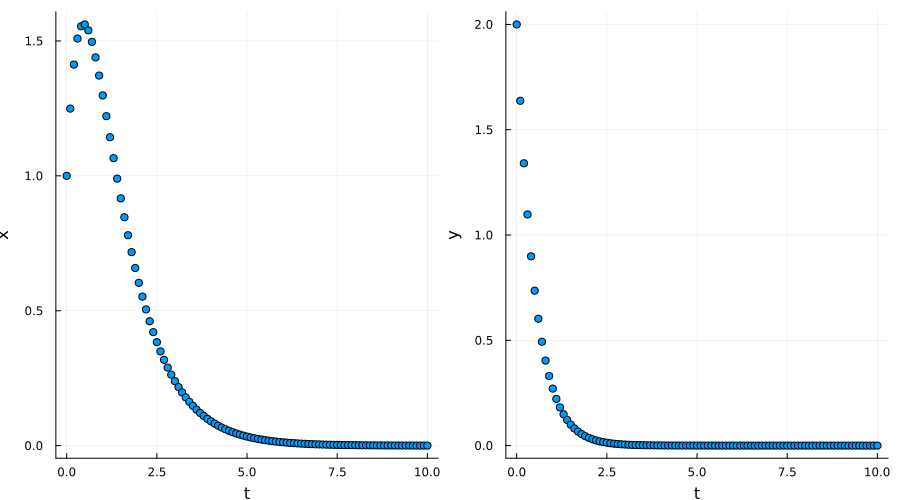

In [83]:
px1 = scatter(0:0.1:10, x, xlabel="t", ylabel="x")
py1 = scatter(0:0.1:10, y, xlabel="t", ylabel="y")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

Now, I check if the transformation $(x* , u* , b, a)$ does not alter the output (x)

where $$ u* = \frac{b(x*+y*)}{a} - x*
$$

In [84]:
a = 1
b = 2

x = [1.0]
y = [5.0]
#here I have inverted the parameters that are inside
for t in 0.1:0.1:10
    push!(x, exp(-b * t)* x[1] + (a/(b - a))* (exp(-a*t) - exp(-b*t))*y[1] )
    push!(y, exp(-a * t) * y[1])
end

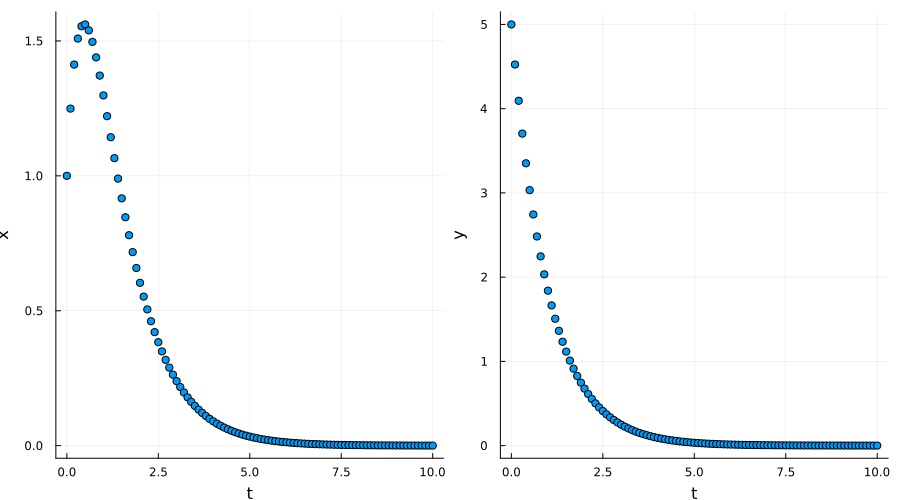

In [85]:
px1 = scatter(0:0.1:10, x, xlabel="t", ylabel="x")
py1 = scatter(0:0.1:10, y, xlabel="t", ylabel="y")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

and indeed they have the same output!
Let's try the formula also for other a and b and y*, x*

In [105]:
a = 5
b = 8

x = [0.0]
y = [7.0]
for t in 0.01:0.01:3
    push!(x, exp(-a * t)* x[1] + (b/(a - b))* (exp(-b*t) - exp(-a*t))*y[1] )
    push!(y, exp(-b * t) * y[1])
end

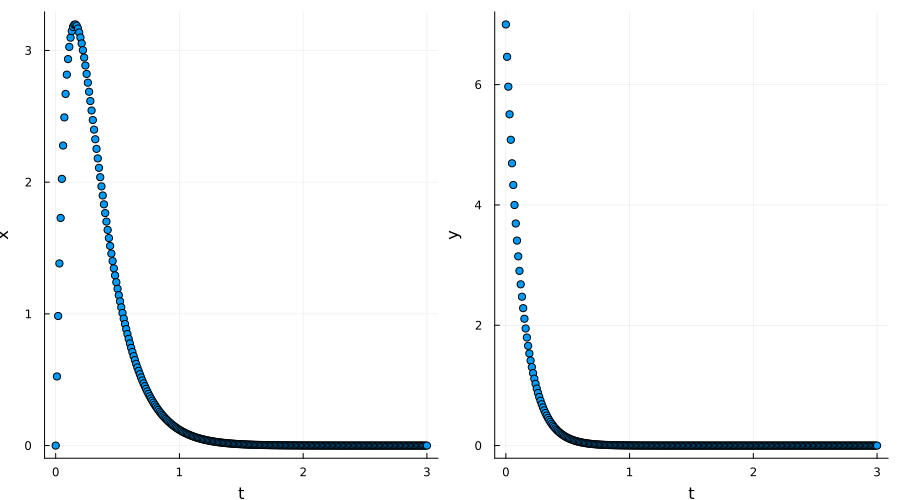

In [106]:
px1 = scatter(0:0.01:3, x, xlabel="t", ylabel="x")
py1 = scatter(0:0.01:3, y, xlabel="t", ylabel="y")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

In [109]:
a = 5
b = 8

x = [0.0]
y = [(b/a)* 7.0]
#here I have inverted the parameters that are inside
for t in 0.01:0.01:3
    push!(x, exp(-b * t)* x[1] + (a/(b - a))* (exp(-a*t) - exp(-b*t))*y[1] )
    push!(y, exp(-a * t) * y[1])
end

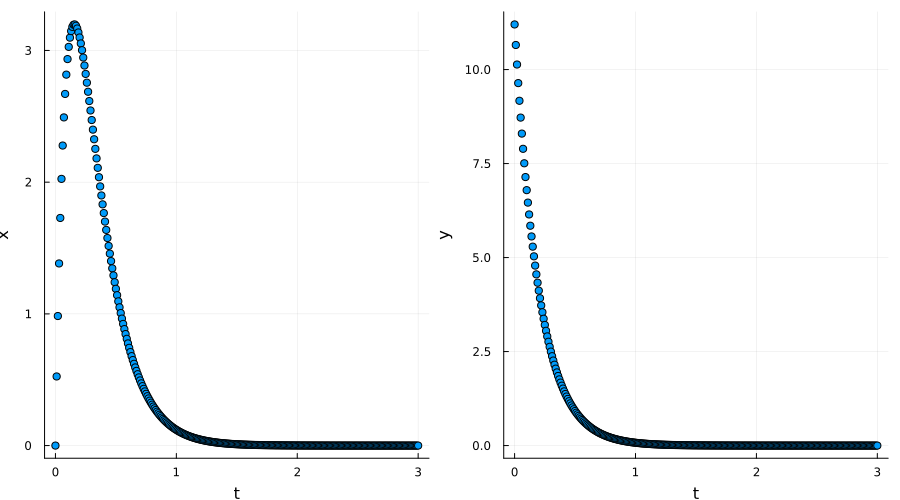

In [110]:
px1 = scatter(0:0.01:3, x, xlabel="t", ylabel="x")
py1 = scatter(0:0.01:3, y, xlabel="t", ylabel="y")
plot(px1, py1, layout = (1,2), legend = false, size=(900, 500))

and indeed also here they are the same

## Lotka-Volterra

### Assess Identifiability

In [111]:
ode_LV = @ODEmodel(
    x1'(t) = a * x1(t) - b * x1(t) * x2(t),
    x2'(t) = -c * x2(t) + d * x1(t) * x2(t),
    y(t) = x1(t)
)

[ Info: Summary of the model:
[ Info: State variables: x2, x1
[ Info: Parameters: a, b, d, c
[ Info: Inputs: 
[ Info: Outputs: y


x1'(t) = a*x1(t) - b*x2(t)*x1(t)
x2'(t) = d*x2(t)*x1(t) - x2(t)*c
y(t) = x1(t)


In [112]:
assess_identifiability(ode_LV)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 0.1224584 seconds
[ Info: Assessing global identifiability
[ Info: Computing IO-equations
┌ Info: Computed in 0.9682895 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.9682895
[ Info: Computing Wronskians
┌ Info: Computed in 0.5140526 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.5140526
[ Info: Dimensions of the Wronskians [5]
┌ Info: Ranks of the Wronskians computed in 0.000111 seconds
│   :rank_time = :rank_time
└   rank_times = 0.000111
[ Info: Assessing global identifiability using the coefficients of the io-equations
┌ Info: Computed in 0.0694735 seconds
│   :check_time = :check_time
└   check_time = 0.0694735
[ Info: Global identifiability assessed in 1.5553428 seconds


Dict{Any, Symbol} with 4 entries:
  a => :globally
  c => :globally
  b => :nonidentifiable
  d => :globally

as discussed today